In [128]:
import pandas as pd
import numpy as np
from datetime import date

pd.options.display.max_rows = 500

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
## read data
df = pd.read_csv('temp_datalab_records_linkedin_company.csv',sep=',', header = 0, skiprows = 0)

/home/yz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [130]:
## check the data

#df.shape

(2426196, 14)

In [131]:
## check the data

#df.columns

Index(['dataset_id', 'as_of_date', 'company_name', 'followers_count',
       'employees_on_platform', 'link', 'industry', 'date_added',
       'date_updated', 'description', 'website', 'entity_id', 'cusip', 'isin'],
      dtype='object')

In [132]:
## drop unused features

df.drop(labels=['link','date_added','date_updated','description','website','entity_id','cusip','isin'], axis=1, inplace=True)

In [133]:
## drop missing data

df.dropna(subset=['company_name', 'followers_count', 'employees_on_platform','industry'])
#df.shape

(2426196, 6)

In [159]:
## clean the data

df['industry'] = [str(name).replace('&amp;', '&') for name in df['industry']]
df['company_name'] = [str(name).replace('&amp;', '&') for name in df['company']]

#df['industry'].value_counts()

In [138]:
## drop missing data

df = df.loc[~(df['industry']=='nan'), :]

In [335]:
## combine some data into a bigger industry category

df['industry'].replace(to_replace=['Airlines/Aviation', 'Aviation & Aerospace'], value='Aviation', inplace=True)
df['industry'].replace(to_replace=['Investment Banking', 'Capital Markets', 'Investment Management'], value='Financial Services', inplace=True)
df['industry'].replace(to_replace=['E-Learning', 'Education Management', 'Higher Education'], value='Education', inplace=True)
df['industry'].replace(to_replace=['Food Production'], value='Food & Beverages', inplace=True)
df['industry'].replace(to_replace=['Information Services'], value='Information Technology and Services', inplace=True)
df['industry'].replace(to_replace=['Law Enforcement', 'Law Practice'], value='Legal Services', inplace=True)
#print(df['industry'].nunique())
#df['industry'].value_counts().sort_index()

In [206]:
## uniform the type of data in 'as_of_date'

df['as_of_date'] = df['as_of_date'].apply(str)

In [207]:
## change the type of data in 'as_of_data' to datetime

df['as_of_date'] = pd.to_datetime(df['as_of_date'])

In [208]:
## subset the data with the date 1/20/2017

df_before = df[df['as_of_date'] < pd.Timestamp(date(2017, 1, 20))]

In [210]:
## subset the data with the date 1/20/2017

df_after = df[df['as_of_date'] >= pd.Timestamp(date(2017, 1, 20))]

In [149]:
#df_before.head(10)

In [150]:
#df_after.loc[df_after['company_name']=='IBM', :].head(20)

In [212]:
## averge employees num and followers num before 1/20/2017

df_before_avg = df_before.groupby(['dataset_id', 'company_name','industry']).agg({'followers_count': np.mean, 'employees_on_platform': np.mean}).reset_index()

In [172]:
#type(df_before_avg)

In [173]:
#df_before_avg['industry'].value_counts()

In [179]:
#df_before_avg.loc[df_before_avg['company_name'] == 'IBM', :]

In [214]:
## averge employees num and followers num after 1/20/2017

df_after_avg = df_after.groupby(['dataset_id', 'company_name','industry']).agg({'followers_count': np.mean, 'employees_on_platform': np.mean}).reset_index()

In [215]:
#df_after_avg.loc[df_after_avg['company_name'] == 'IBM', :]

In [355]:
#df_after_avg.columns

In [217]:
#df_after_avg.head(10)

In [354]:
#df_before_avg[['followers_count', 'employees_on_platform']].describe()

In [353]:
#df_after_avg[['followers_count', 'employees_on_platform']].describe()

In [352]:
#np.log(df_before_avg['employees_on_platform'] + 1).hist()

In [351]:
#np.log(df_before_avg['followers_count'] + 1).hist()

In [350]:
#np.log(df_after_avg['employees_on_platform']+1).hist()

In [223]:
## get logarithm

df_before_avg['log_employees_on_platform'] = np.log(df_before_avg['employees_on_platform']+1)
df_after_avg['log_employees_on_platform'] = np.log(df_after_avg['employees_on_platform']+1)
df_before_avg['log_followers_count'] = np.log(df_before_avg['followers_count']+1)
df_after_avg['log_followers_count'] = np.log(df_after_avg['followers_count']+1)

In [349]:
#df_before_avg['log_employees_on_platform'].hist()

In [336]:
#df_before_avg_ind = df_before_avg.groupby('industry').agg({'log_employees_on_platform': np.sum})
#df_before_avg_ind.head(5)

In [225]:
## calculate mean and std of employess and followers

employees_before_mean = np.mean(df_before_avg['log_employees_on_platform'])
followers_before_mean = np.mean(df_before_avg['log_followers_count'])
employees_after_mean = np.mean(df_after_avg['log_employees_on_platform'])
followers_after_mean = np.mean(df_after_avg['log_followers_count'])

employees_before_std = np.std(df_before_avg['log_employees_on_platform'])
followers_before_std = np.std(df_before_avg['log_followers_count'])
employees_after_std = np.std(df_after_avg['log_employees_on_platform'])
followers_after_std = np.std(df_after_avg['log_followers_count'])

In [226]:
## normalize the data

df_before_avg['normalized_log_employees_on_platform'] = (df_before_avg['log_employees_on_platform'] - employees_before_mean) / employees_before_std
df_after_avg['normalized_log_employees_on_platform'] = (df_after_avg['log_employees_on_platform'] - employees_after_mean) / employees_after_std

In [334]:
#df_before_avg.head(10)

In [356]:
## group by industry

df_before_avg_ind_normal = df_before_avg.groupby('industry').agg({'normalized_log_employees_on_platform': np.sum}).reset_index()
df_before_avg_ind_normal.columns = ['industry', 'normalized_before_log_employees_on_platform']
#df_before_avg_ind_normal.head(3)

In [357]:
## group by industry

df_after_avg_ind_normal = df_after_avg.groupby('industry').agg({'normalized_log_employees_on_platform': np.sum}).reset_index()
df_after_avg_ind_normal.columns = ['industry', 'normalized_after_log_employees_on_platform']
#df_after_avg_ind_normal.head(3)

In [312]:
## merge the data of before and after 1/20/2017

df_before_after_ind_normal = pd.merge(df_before_avg_ind_normal, df_after_avg_ind_normal, on = ['industry'])

In [358]:
#df_before_after_ind_normal.head(5)

In [314]:
## sort the data based on before 1/20/2017

df_ind = df_before_after_ind_normal.sort_values(by=['normalized_before_log_employees_on_platform'], ascending= False)
df_ind.columns = ['industry', 'before 1/20/2017', 'after 1/20/2017']

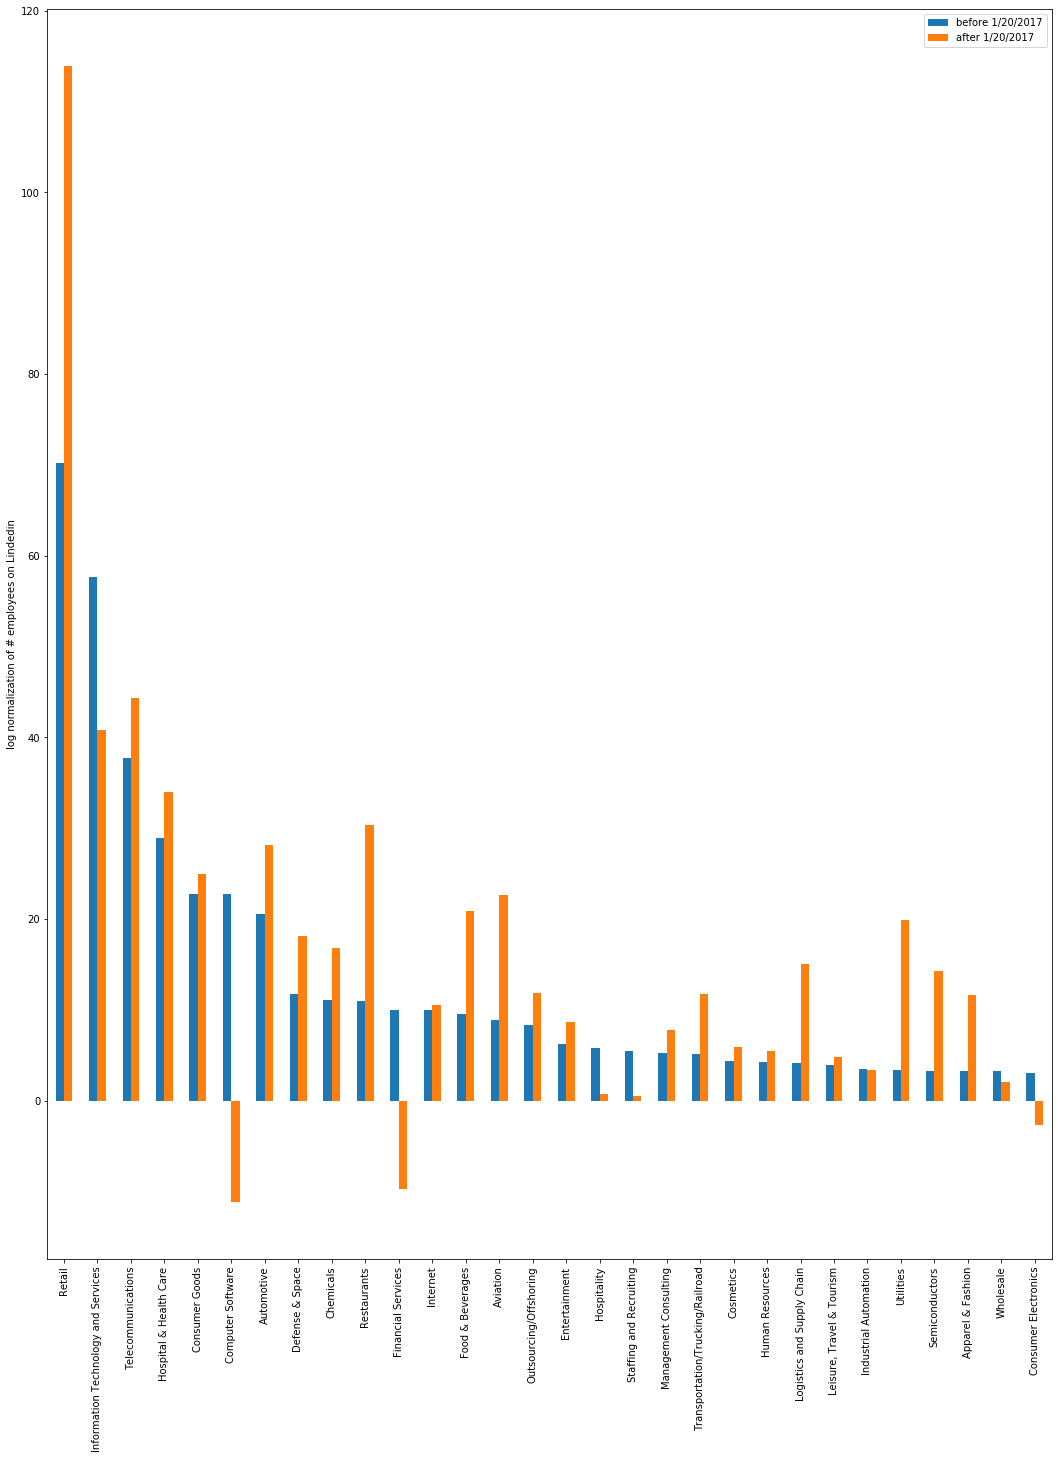

In [330]:
## plot the bar graph

ax = df_ind.head(30).plot(x="industry", y=["before 1/20/2017", "after 1/20/2017"], kind="bar", figsize=(18, 23))
ax.set_ylabel('log normalization of # employees on Lindedin')
ax.set_xlabel('')
ax.figure.savefig('industry_plot.png')

In [342]:
## group by company

df_before_avg_com_normal = df_before_avg.groupby('company_name').agg({'normalized_log_employees_on_platform': np.sum}).reset_index()
df_before_avg_com_normal.columns = ['company', 'before 1/20/2017']

In [343]:
## group by company

df_after_avg_com_normal = df_after_avg.groupby('company_name').agg({'normalized_log_employees_on_platform': np.sum}).reset_index()
df_after_avg_com_normal.columns = ['company', 'after 1/20/2017']

In [346]:
## merge the data

df_com = pd.merge(df_before_avg_com_normal, df_after_avg_com_normal, on = ['company']).sort_values(by='before 1/20/2017',ascending = False)

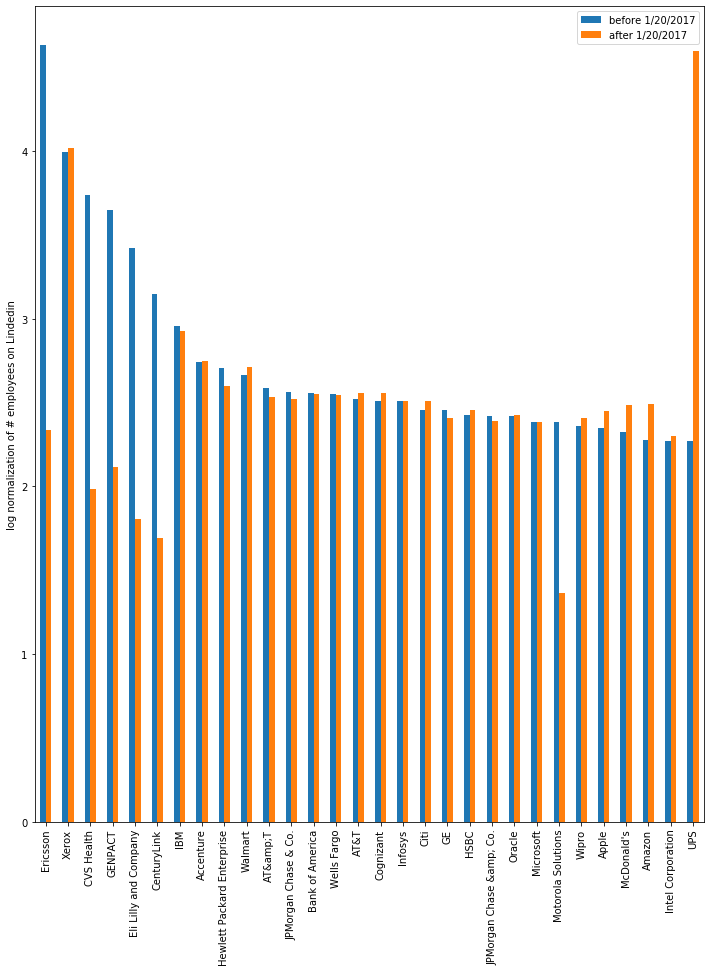

In [348]:
## plot the bar graph

ax = df_com.head(30).plot(x="company", y=["before 1/20/2017", "after 1/20/2017"], kind="bar", figsize=(12, 15))
ax.set_ylabel('log normalization of # employees on Lindedin')
ax.set_xlabel('')
ax.figure.savefig('company_plot.png')